## Basic Operations

In [16]:
# importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

In [17]:
# handling warnings 

import warnings
warnings.filterwarnings("ignore")

In [18]:
# importing our test data

test_data=pd.read_csv('/Users/adityabanerjee/Documents/Cancer /Datasets/Cleaned/cleaned_testing_data.csv')

In [19]:
# splitting independent and dependent features

X=test_data.drop(columns=['Diagnosis'], axis=1)         # independent features
y=test_data['Diagnosis']                                # dependent feature

## Logistic Regression

In [20]:
# loading our model

with open("/Users/adityabanerjee/Documents/Cancer /Exported Models/logreg.pkl", "rb") as f:
    logreg = pickle.load(f)

In [21]:
# making predictions 

y_pred_logreg=logreg.predict(X)

In [22]:
# evaluating our model

cm_logreg=confusion_matrix(y_true=y, y_pred=y_pred_logreg)
cr_logreg=classification_report(y_true=y, y_pred=y_pred_logreg)
acc_score_logreg=accuracy_score(y_pred=y_pred_logreg, y_true=y)

print("Logistic Regression:\n")
print(f"Confusion Matrix:\n{cm_logreg}\n\nClassification Report:\n{cr_logreg}\nAccuracy Score:{acc_score_logreg}")

Logistic Regression:

Confusion Matrix:
[[107   1]
 [  3  60]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Accuracy Score:0.9766081871345029


#### ROC AUC Analysis

In [23]:
# getting predicted probabilities

y_scores_logreg=logreg.predict_proba(X)[:,1]
fpr, tpr, thresholds=roc_curve(y_true=y, y_score=y_scores_logreg)
roc_auc_logreg=roc_auc_score(y_true=y, y_score=y_scores_logreg)

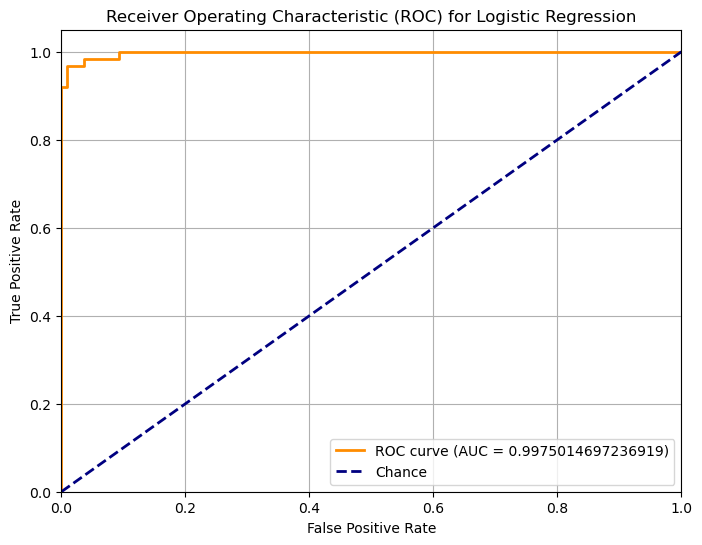

In [24]:
# plotting the roc_auc curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_logreg})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## KNN

In [25]:
# loading our model

with open("/Users/adityabanerjee/Documents/Cancer /Exported Models/knn.pkl", "rb") as f:
    knn=pickle.load(f)

In [26]:
# making predictions

y_pred_knn=knn.predict(X)

In [27]:
# evaluating our model

cm_knn=confusion_matrix(y_true=y, y_pred=y_pred_knn)
cr_knn=classification_report(y_true=y, y_pred=y_pred_knn)
acc_score_knn=accuracy_score(y_pred=y_pred_knn, y_true=y)

print("KNeighborsClassifier:\n")
print(f"Confusion Matrix:\n{cm_knn}\n\nClassification Report:\n{cr_knn}\nAccuracy Score:{acc_score_knn}")

KNeighborsClassifier:

Confusion Matrix:
[[96 12]
 [16 47]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       108
           1       0.80      0.75      0.77        63

    accuracy                           0.84       171
   macro avg       0.83      0.82      0.82       171
weighted avg       0.83      0.84      0.84       171

Accuracy Score:0.8362573099415205


#### ROC AUC Analysis

In [28]:
# getting predicted probabilities

y_scores_knn=knn.predict_proba(X)[:,1]
fpr, tpr, thresholds=roc_curve(y_score=y_pred_knn, y_true=y)
roc_auc_knn=roc_auc_score(y_true=y, y_score=y_scores_knn)

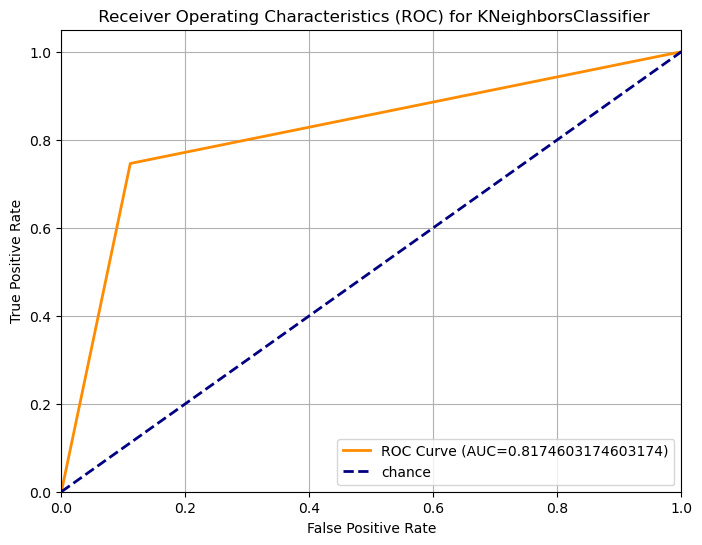

In [29]:
# plotting the roc_auc curve

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange',lw=2, label=f'ROC Curve (AUC={roc_auc_knn})')
plt.plot([0,1],[0,1], color='navy', lw=2, label='chance', linestyle="--")


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1.0])
plt.ylim([0, 1.05])
plt.title(" Receiver Operating Characteristics (ROC) for KNeighborsClassifier")
plt.legend(loc='lower right')
plt.grid()
plt.show()

## SVC

In [30]:
# loading our model

with open("/Users/adityabanerjee/Documents/Cancer /Exported Models/svc.pkl", "rb") as f:
    svc=pickle.load(f)

In [31]:
# making predictions

y_pred_svc=svc.predict(X)

In [32]:
X.columns

Index(['Unnamed: 0', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst',
       'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [33]:
# evaluating our model

cm_svc=confusion_matrix(y_true=y, y_pred=y_pred_svc)
cr_svc=classification_report(y_true=y, y_pred=y_pred_svc)
acc_score_svc=accuracy_score(y_pred=y_pred_svc, y_true=y)

print("SVC:\n")
print(f"Confusion Matrix:\n{cm_svc}\n\nClassification Report:\n{cr_svc}\nAccuracy Score:{acc_score_svc}")

SVC:

Confusion Matrix:
[[107   1]
 [  1  62]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.98      0.98      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

Accuracy Score:0.9883040935672515


#### ROC AUC Analysis

In [34]:
# getting predicted probabilities

y_scores_svc=svc.decision_function(X)
fpr, tpr, thresholds=roc_curve(y_true=y, y_score=y_scores_svc)
roc_auc_svc=roc_auc_score(y_true=y, y_score=y_scores_svc)

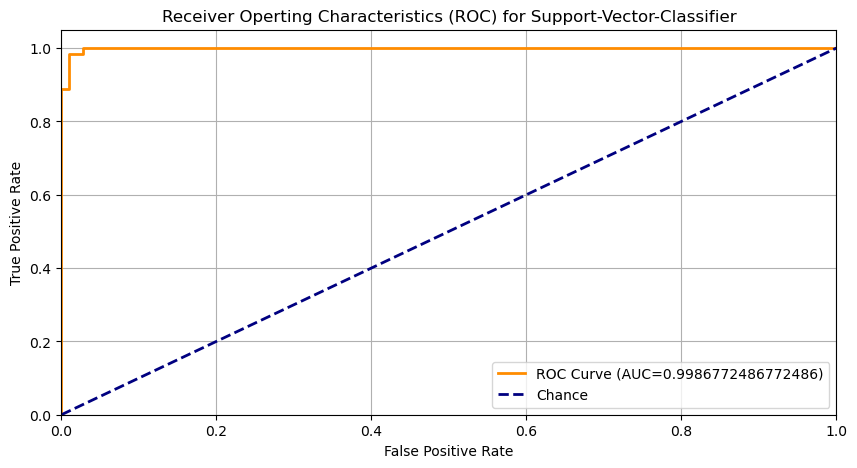

In [35]:
# plotting the roc_auc curve

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC={roc_auc_svc})')
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--', label='Chance')

plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operting Characteristics (ROC) for Support-Vector-Classifier")
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Exporting our Best Model

#### Comparing the 3 Models

Accuracy Score:

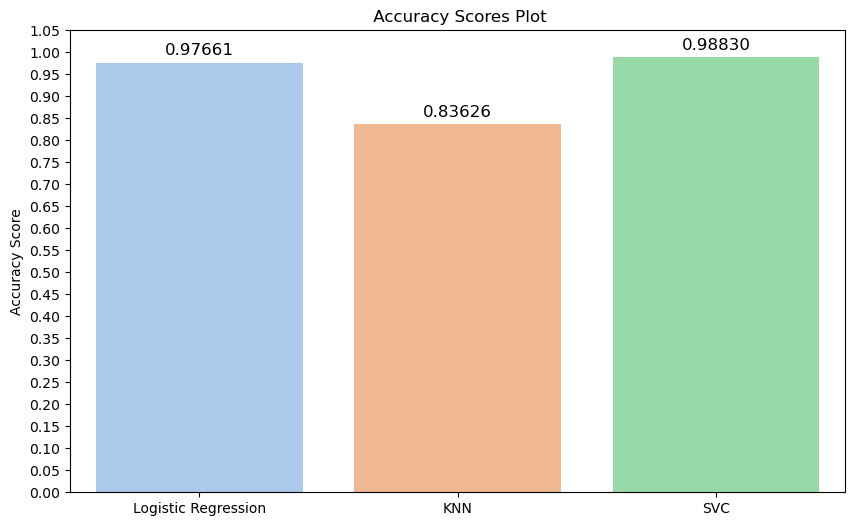

In [36]:
estimator_names=['Logistic Regression', 'KNN', 'SVC']
acc_scores=[acc_score_logreg, acc_score_knn, acc_score_svc]

plt.figure(figsize=(10,6))
plt.ylabel("Accuracy Score")
plt.title(" Accuracy Scores Plot")
ax=sns.barplot(x=estimator_names, y=acc_scores, palette='pastel')
for i, acc in enumerate(acc_scores):
    ax.text(i, acc + 0.01, f"{acc:.5f}", ha='center', va='bottom', fontsize=12)

# Y-axis calibration
import matplotlib.ticker as mtick
ax.set_yticks(np.arange(0, 1.1, 0.05))        # Tick every 0.05
ax.set_ylim(0, 1.05)                          # Range from 0 to slightly above 1
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y:.2f}'))  # Format to 2 decimals

Precision Recall:

In [37]:
# calculating precision recall scores

precision_svc=(cm_svc[0][0])/(cm_svc[0][0]+cm_svc[0][1])
recall_svc=(cm_svc[0][0])/(cm_svc[0][0]+cm_svc[1][0])

precision_knn=(cm_knn[0][0])/(cm_knn[0][0]+cm_knn[0][1])
recall_knn=(cm_knn[0][0])/(cm_knn[0][0]+cm_knn[1][0])

precision_logreg=(cm_logreg[0][0])/(cm_logreg[0][0]+cm_logreg[0][1])
recall_logreg=(cm_logreg[0][0])/(cm_logreg[0][0]+cm_logreg[1][0])

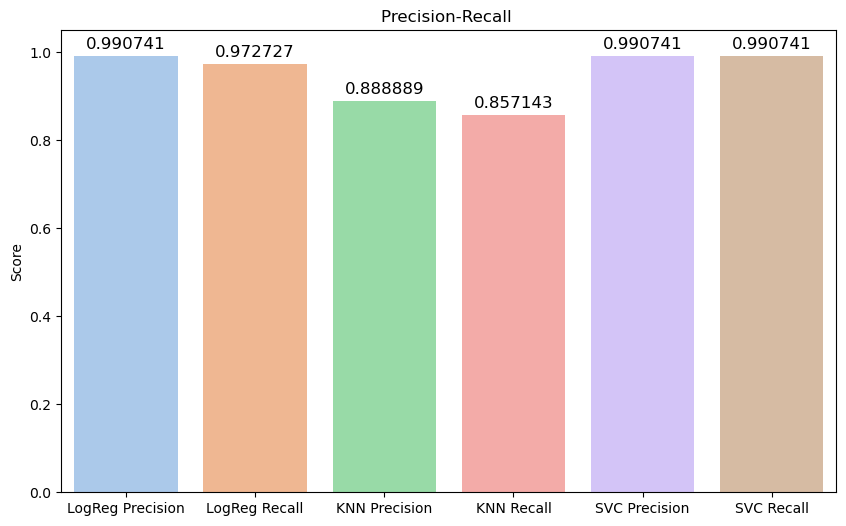

In [38]:
# plotting the scores

x_labels=['LogReg Precision','LogReg Recall','KNN Precision','KNN Recall','SVC Precision','SVC Recall']
y_values=[precision_logreg, recall_logreg, precision_knn, recall_knn, precision_svc, recall_svc]

plt.figure(figsize=(10,6))
ax=sns.barplot(x=x_labels, y=y_values, palette='pastel')
plt.ylim(0,1.05)
plt.ylabel("Score")
plt.title("Precision-Recall ")

for i, acc in enumerate(y_values):
    ax.text(i, acc + 0.01, f"{acc:.6f}", ha='center', va='bottom', fontsize=12)


Since Cancer Detection is a subject where it is more dangerous to classify that someone does not have cancer whereas in reality they do have Cancer (False Negative) than classifying someone who does not have Cancer as someone who has Cancer (False Positive). Thus we try to minimize our False Negatives. 

Hence in order to select our best model we will be taking into consideration, the one with the highest Recall Score.

Thus from the above graph, it is clear that the model with the best Recall score is the Support Vector Classifier Model. Thus we will be exporting our SVC model as our best model.

In [39]:
with open(file='/Users/adityabanerjee/Documents/Cancer /Exported Models/Best Model/cancer_classification_model.pkl', mode="wb") as f:
    pickle.dump(svc,f)